# Measles

This data contains the overall and measles, mumps, and rubella immunization rates for schools across the United States. Each row corresponds to one school and includes a number of variables including the latitude, longitude, name, and vaccination rates.


In [1]:
import pandas as pd

df = pd.read_csv("data/measles.csv")
df.sample(5)

,index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
26936,1742,New Jersey,NaN,Shiras Chaim,NaN,NaN,Ocean,NaN,48.0,-1.000000,89.6,NaN,NaN,NaN,40.070329,-74.195098
26861,1667,New Jersey,NaN,Lakeview,NaN,NaN,Morris,NaN,94.0,-1.000000,91.5,NaN,NaN,NaN,40.870529,-74.503517
16624,1948,Illinois,2018-19,Emerson Elementary,NaN,Elmhurst,Dupage,NaN,445.0,97.977528,-1.0,NaN,NaN,NaN,41.909727,-87.959899
39116,368,South Dakota,2017-18,Silver Lake Colony,NaN,NaN,Clark,NaN,1.0,-1.000000,-1.0,NaN,NaN,NaN,44.867293,-97.607658
25619,425,New Jersey,NaN,Ogdensburg Public,NaN,NaN,Sussex,NaN,22.0,-1.000000,100.0,NaN,NaN,NaN,41.078532,-74.594352


In [2]:
#Import required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#### Data Understanding 

In [3]:
df.shape

(46411, 16)

In [4]:
df.dtypes

index         int64
state        object
year         object
name         object
type         object
city         object
county       object
district    float64
enroll      float64
mmr         float64
overall     float64
xrel         object
xmed        float64
xper        float64
lat         float64
lng         float64
dtype: object

In [5]:
df.isnull().sum()

index           0
state           0
year         4681
name            0
type        27174
city        17339
county       5158
district    46411
enroll      12844
mmr             0
overall         0
xrel        46317
xmed        33439
xper        40000
lat          1552
lng          1552
dtype: int64

In [6]:
df.type.value_counts()

Public          12539
Private          4910
Kindergarten     1302
Charter           273
Nonpublic         166
BOCES              47
Name: type, dtype: int64

In [7]:
df.groupby(['type']).overall.mean()

type
BOCES           -1.000000
Charter         -1.000000
Kindergarten    87.811782
Nonpublic       -1.000000
Private         22.959273
Public          53.312202
Name: overall, dtype: float64

In [8]:
df.groupby(['type']).mmr.mean()

type
BOCES           98.753191
Charter         68.598095
Kindergarten    94.262028
Nonpublic        9.342349
Private         58.683153
Public          89.412972
Name: mmr, dtype: float64

#### Exploration
Too many Null values in this dataset. 
1. 58% of column 'type' is null which is object datatype
2. 37% of column "city" is null which is object datatype
3. Column "district" is completely null and hence can be omitted
4. 27% of column "enroll" is null which is float datatype and can be manipulated.
5. 99% of column "xrel" is null
6. 72% of column "xmed" is null 
7. 86%% of column "xper" is null 
8. Can make a new column merging all 3 exceptions into 1 as a mean column because of many nulls in those columns. 

Also,
1. Kindergarden have highest average of overall vaccine rate.
2. BOCES have highest average of mmr vaccine rate.

In [9]:
#Top 10 states with highest number of schools after dropping district column.
df = df.drop('district', axis=1)
df_top10 = df.state.value_counts(ascending = False).head(10)
df_top10 = df_top10.index
df_top10

Index(['California', 'New York', 'Illinois', 'Florida', 'New Jersey', 'Ohio',
       'Michigan', 'North Carolina', 'Pennsylvania', 'Washington'],
      dtype='object')

In [10]:
df_top_states = df[df.state.isin(df_top10)]
df_top_states

,index,state,year,name,type,city,county,enroll,mmr,overall,xrel,xmed,xper,lat,lng
1824,1,California,2018-19,Abby Reinke Elementary,Public,Temecula,Riverside,137.0,99.0,96.0,NaN,2.0,NaN,33.492008,-117.087291
1825,2,California,2018-19,Abraham Lincoln Elementary,Public,Santa Ana,Orange,135.0,99.0,99.0,NaN,1.0,NaN,33.741155,-117.902009
1826,3,California,2018-19,Achieve Academy,Public,Oakland,Alameda,116.0,99.0,99.0,NaN,1.0,NaN,37.782075,-122.226605
1827,4,California,2018-19,Ada Clegg Elementary,Public,Huntington Beach,Orange,100.0,99.0,97.0,NaN,NaN,NaN,33.747813,-118.018803
1828,5,California,2018-19,Adam William Laird Elementary,Public,Santa Maria,Santa Barbara,121.0,99.0,99.0,NaN,1.0,NaN,34.936178,-120.442216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44891,1563,Washington,NaN,Wade King Elementary,NaN,Bellingham,Whatcom,NaN,-1.0,-1.0,NaN,NaN,NaN,48.717632,-122.442174
44892,1564,Washington,NaN,Warden Hutterian,NaN,Warden,Adams,NaN,-1.0,-1.0,NaN,NaN,NaN,47.057164,-118.949766
44893,1565,Washington,NaN,Washington Elementary,NaN,Centralia,Lewis,NaN,-1.0,-1.0,NaN,NaN,NaN,46.708537,-122.953726
44894,1566,Washington,NaN,Woodway Elementary,NaN,Edmonds,Snohomish,NaN,-1.0,-1.0,NaN,NaN,NaN,47.782054,-122.360847


#### Visualise using seaborn and matplotlib for the overall and mmr vaccination rates in df_top_states dataframe. 

In [11]:
#Find the mean overall for all states
a = df_top_states.groupby('state').overall.mean()

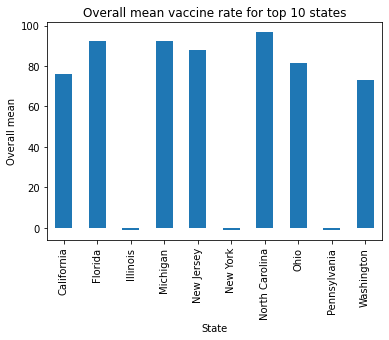

In [12]:
#Plotting 
a.plot.bar(xlabel='State', ylabel='Overall mean', title ='Overall mean vaccine rate for top 10 states');

In [13]:
#Find the mean mmr for all states
b = df_top_states.groupby('state').mmr.mean()

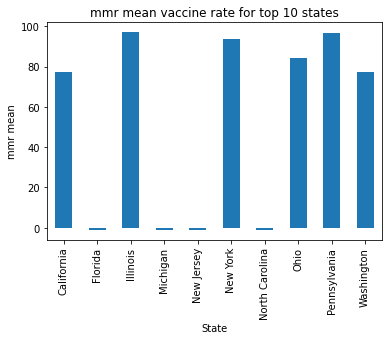

In [14]:
#Plotting 
b.plot.bar(xlabel='State', ylabel='mmr mean', title ='mmr mean vaccine rate for top 10 states');

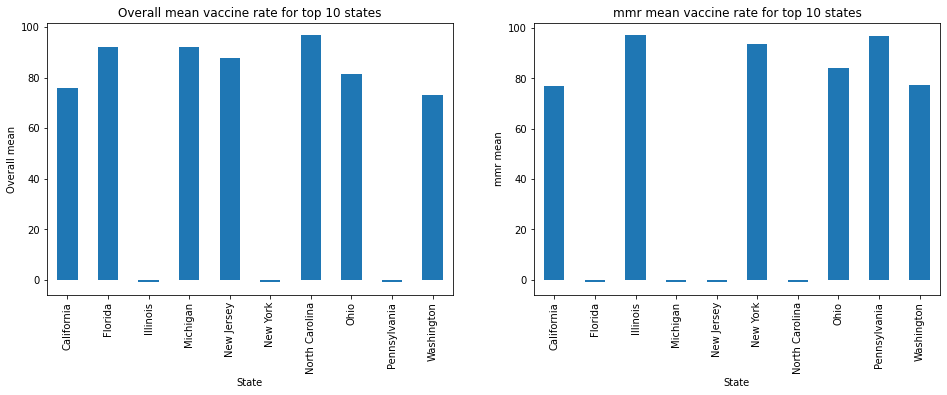

In [15]:
#Side by side comparison of overall and mmr means 
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
a.plot.bar(xlabel='State', ylabel='Overall mean', title ='Overall mean vaccine rate for top 10 states', ax=axis[0]);
b.plot.bar(xlabel='State', ylabel='mmr mean', title ='mmr mean vaccine rate for top 10 states', ax=axis[1]);

##### Conclusion

Out of top 10 states with high number of school,only 3 states have very good overall and MMR vaccine rates. i.e
Only California, Ohio and Washington have good Overall and MMR vaccine rates

#### To check whether location affects the vaccine rate, try heatmeap to find the co-relation between columns.
Before that, lets merge xrel, xmed, and xper into a single column, as their mean 

In [16]:
#Merging xrel, xmed, xper into exmean taking their mean as a new column
df['exmean'] = (df['xrel']+df['xmed']+df['xper'])/3
df_exmean = df.drop(['xrel','xmed','xper'], axis =1)
df_exmean

,index,state,year,name,type,city,county,enroll,mmr,overall,lat,lng,exmean
0,1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,51.0,100.0,-1.0,31.347819,-110.938031,NaN
1,2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,22.0,100.0,-1.0,32.221922,-110.896103,NaN
2,3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,85.0,100.0,-1.0,32.130493,-111.117005,NaN
3,4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,60.0,100.0,-1.0,33.485447,-112.130633,NaN
4,5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,43.0,100.0,-1.0,33.495620,-112.224722,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46406,1511,Wisconsin,2018-19,Vance Creek Amish,NaN,Prairie Farm,Barron,NaN,-1.0,-1.0,45.232586,-91.983063,NaN
46407,1512,Wisconsin,2018-19,Walnut Grove Amish,NaN,Hillpoint,Sauk,NaN,-1.0,-1.0,43.423794,-90.112525,NaN
46408,1513,Wisconsin,2018-19,Wauwatosa Virtual Academy,NaN,Wauwatosa,Milwaukee,NaN,-1.0,-1.0,43.059360,-88.063521,NaN
46409,1514,Wisconsin,2018-19,Weston Elementary,NaN,Weston,Marathon,NaN,-1.0,-1.0,44.910337,-89.571602,NaN


In [17]:
#Check the null values in the newly created column
df_exmean.exmean.isnull().sum()

46410

This shows that even the mean of these 3 columns contains 99% nulls. 
And hence, it can be drop too.

In [18]:
#Lets name it as a new dataframe called df_withoutex (Excluding all the exceptions and their mean columns)
df_withoutex = df_exmean.drop('exmean', axis=1)
df_withoutex

,index,state,year,name,type,city,county,enroll,mmr,overall,lat,lng
0,1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,51.0,100.0,-1.0,31.347819,-110.938031
1,2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,22.0,100.0,-1.0,32.221922,-110.896103
2,3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,85.0,100.0,-1.0,32.130493,-111.117005
3,4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,60.0,100.0,-1.0,33.485447,-112.130633
4,5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,43.0,100.0,-1.0,33.495620,-112.224722
...,...,...,...,...,...,...,...,...,...,...,...,...
46406,1511,Wisconsin,2018-19,Vance Creek Amish,NaN,Prairie Farm,Barron,NaN,-1.0,-1.0,45.232586,-91.983063
46407,1512,Wisconsin,2018-19,Walnut Grove Amish,NaN,Hillpoint,Sauk,NaN,-1.0,-1.0,43.423794,-90.112525
46408,1513,Wisconsin,2018-19,Wauwatosa Virtual Academy,NaN,Wauwatosa,Milwaukee,NaN,-1.0,-1.0,43.059360,-88.063521
46409,1514,Wisconsin,2018-19,Weston Elementary,NaN,Weston,Marathon,NaN,-1.0,-1.0,44.910337,-89.571602


In [22]:
df_withoutex.state.value_counts().count()

32

In [45]:
#Lets assign a value for all these categories.

#Before that, make a copy of the dataset
df_new = df_withoutex.copy()

#Convert the state,year and type into a categorical column
df_new['state'] = df_new['state'].astype('category')
df_new['year'] = df_new['year'].astype('category')
df_new['type'] = df_new['type'].astype('category')

#Label the categories using .cat.codes 
df_new['state'] = df_new['state'].cat.codes
df_new['year'] = df_new['year'].cat.codes
df_new['type'] = df_new['type'].cat.codes
df_new

,index,state,year,name,type,city,county,enroll,mmr,overall,lat,lng
0,1,0,2,A J Mitchell Elementary,5,Nogales,Santa Cruz,51.0,100.0,-1.0,31.347819,-110.938031
1,2,0,2,Academy Del Sol,1,Tucson,Pima,22.0,100.0,-1.0,32.221922,-110.896103
2,3,0,2,Academy Del Sol - Hope,1,Tucson,Pima,85.0,100.0,-1.0,32.130493,-111.117005
3,4,0,2,Academy Of Mathematics And Science South,1,Phoenix,Maricopa,60.0,100.0,-1.0,33.485447,-112.130633
4,5,0,2,Acclaim Academy,1,Phoenix,Maricopa,43.0,100.0,-1.0,33.495620,-112.224722
...,...,...,...,...,...,...,...,...,...,...,...,...
46406,1511,31,2,Vance Creek Amish,-1,Prairie Farm,Barron,NaN,-1.0,-1.0,45.232586,-91.983063
46407,1512,31,2,Walnut Grove Amish,-1,Hillpoint,Sauk,NaN,-1.0,-1.0,43.423794,-90.112525
46408,1513,31,2,Wauwatosa Virtual Academy,-1,Wauwatosa,Milwaukee,NaN,-1.0,-1.0,43.059360,-88.063521
46409,1514,31,2,Weston Elementary,-1,Weston,Marathon,NaN,-1.0,-1.0,44.910337,-89.571602


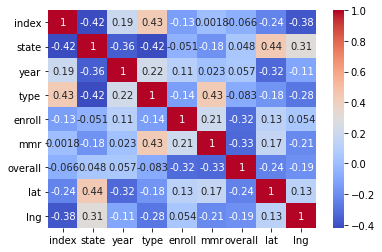

In [46]:
#Lets try heatmap to check relation between state and overall 
sns.heatmap(df_new.corr(), cmap='coolwarm', annot=True);

##### Observation
After labelling the states, we found that there is no correlation between the state and the overall vaccine rate 

#### Model Building to predict overall vaccine rate for df_new data

In [73]:
#Importing the packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [76]:
#Checking the nulls
df_new.isnull().sum()

index          0
state          0
year           0
name           0
type           0
city       17339
county      5158
enroll     12844
mmr            0
overall        0
lat         1552
lng         1552
dtype: int64

In [77]:
#Lets drop the nulls since the null to total ratio is low, 
df_new1 = df_new[df_new['enroll'].notna()]
df_new2 = df_new1[df_new1['lat'].notna()]
df_model= df_new2[df_new2['lng'].notna()]
df_model

,index,state,year,name,type,city,county,enroll,mmr,overall,lat,lng
0,1,0,2,A J Mitchell Elementary,5,Nogales,Santa Cruz,51.0,100.0,-1.0,31.347819,-110.938031
1,2,0,2,Academy Del Sol,1,Tucson,Pima,22.0,100.0,-1.0,32.221922,-110.896103
2,3,0,2,Academy Del Sol - Hope,1,Tucson,Pima,85.0,100.0,-1.0,32.130493,-111.117005
3,4,0,2,Academy Of Mathematics And Science South,1,Phoenix,Maricopa,60.0,100.0,-1.0,33.485447,-112.130633
4,5,0,2,Acclaim Academy,1,Phoenix,Maricopa,43.0,100.0,-1.0,33.495620,-112.224722
...,...,...,...,...,...,...,...,...,...,...,...,...
41856,345,28,2,Forrest Ward Memorial,-1,NaN,Bennington,5.0,-1.0,-1.0,42.916618,-73.204979
41857,346,28,2,Green Mountain Montessori,-1,NaN,Chittenden,3.0,-1.0,-1.0,44.511114,-73.058111
41858,347,28,2,Pacem,-1,NaN,Washington,5.0,-1.0,-1.0,44.254566,-72.567528
41859,348,28,2,Sugarwood,-1,NaN,Rutland,3.0,-1.0,-1.0,43.666875,-72.987088


In [78]:
#Now, check the available Nulls 
df_model.isnull().sum()

index          0
state          0
year           0
name           0
type           0
city       14607
county      4652
enroll         0
mmr            0
overall        0
lat            0
lng            0
dtype: int64

##### Since we are not going to use city and enroll to build the model, there is no need to work on Nulls on those columns

In [80]:
#Determine the X and y variables

X = df_model.drop(['overall', 'name', 'city', 'county' ], axis=1)
y = df_model['overall']

In [81]:
#Making sure the train have no nulls 
X.isnull().sum()

index     0
state     0
year      0
type      0
enroll    0
mmr       0
lat       0
lng       0
dtype: int64

In [82]:
#Lets split the data
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2, random_state=4)

In [83]:
#Lets try KNeighborsRegressor 
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(Xtrain, ytrain)

KNeighborsRegressor()

In [91]:
#Lets do prediction
ypredKnn= knn.predict(Xtest)

In [92]:
#Lets see the accuracy 
metrics.r2_score(ytest,ypredKnn)

0.8624509110709835

##### The accuracy is 86.2% for a KnnRegression model

In [89]:
#Lets try LinearRegression 
lr = LinearRegression()
lr.fit(Xtrain, ytrain)

LinearRegression()

In [90]:
#Lets predict
ypredlinear = lr.predict(Xtest)

In [93]:
#Lets see the accuracy 
metrics.r2_score(ytest,ypredlinear)

0.3845722306192464

#### The linear regression model performs worst than Knn model. Hence Knn can be used to build the model. 

#### Let scale the data and try Knn model

In [95]:
#Scaling 
MinMax = MinMaxScaler()

In [96]:
#Fit and transform the data
MinMax_train = MinMax.fit_transform(Xtrain)
MinMax_test = MinMax.fit_transform(Xtest)

In [98]:
#Lets try KNeighborsRegressor again with the scaled data
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(MinMax_train, ytrain)

KNeighborsRegressor()

In [99]:
#Predict using the scaled data
ypredMinMax = knn.predict(MinMax_test)

In [101]:
#Check the model accuracy
metrics.r2_score(ytest,ypredMinMax)

0.989380828355121

## Conclusion

##### After scaling using MinMax function, the accuracy increased from 86.2% to 98.9%